In [1]:
//%jsroot on
#define _15C 152.7

In [2]:

Int_t *I,J=0;
I=&J;

int start = 0;
int stop = 4;
TChain *fch;
fch = new TChain("tree", "tele");
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/jws202/RootFile_lv1/202506140407%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  fch->AddFile(fileName.Data());
}


TCanvas *c1=new TCanvas;

In [3]:
Double_t Q,Ex,Theta;
Int_t i;
TGraph *T1Etheta_B14He3_0= new TGraph;
Double_t Ex_0=0;
  for(Theta=20.;Theta<50.;Theta=Theta+0.02){
    for(Ex=0;Ex<150;Ex=Ex+0.001){
    Q=-8.56-((111.904823874/110.907740127-1.)*(_15C*112)+(2.01410177811/110.907740127+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(111.904823874*2.01410177811*_15C*112*Ex)/110.907740127);
        if(fabs(Q-Ex_0)<0.1){
            T1Etheta_B14He3_0->SetPoint(i++,Theta,Ex);
        }
    }
  }


TGraph *T1Etheta_pp_0= new TGraph;
Ex_0=16;
  for(Theta=20.;Theta<50.;Theta=Theta+0.02){
    for(Ex=0;Ex<10;Ex=Ex+0.001){
    Q=-25-((111.904823874/111.904823874-1.)*(_15C*112)+(1.00782503223/111.904823874+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(111.904823874*1.00782503223*_15C*112*Ex)/111.904823874);
        if(fabs(Q-Ex_0)<0.1){
            T1Etheta_pp_0->SetPoint(i++,Theta,Ex);
        }
    }
  }

TGraph *T1Etheta_pp_1= new TGraph;
Ex_0=25;
  for(Theta=20.;Theta<50.;Theta=Theta+0.02){
    for(Ex=0;Ex<10;Ex=Ex+0.001){
    Q=-25-((111.904823874/111.904823874-1.)*(_15C*112)+(1.00782503223/111.904823874+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(111.904823874*1.00782503223*_15C*112*Ex)/111.904823874);
        if(fabs(Q-Ex_0)<0.1){
            T1Etheta_pp_1->SetPoint(i++,Theta,Ex);
        }
    }
  }

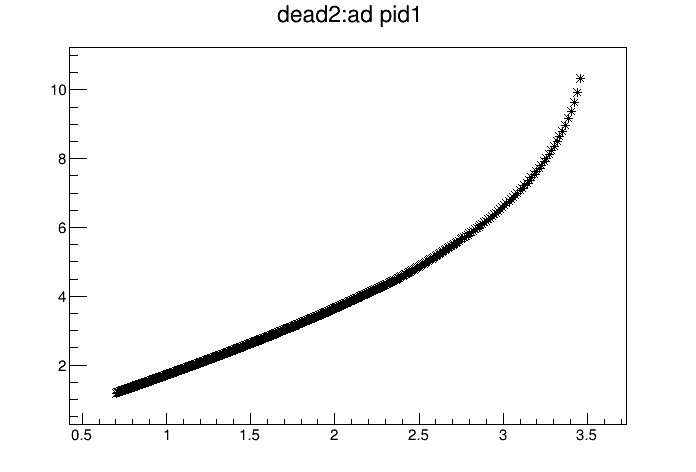

In [4]:
TFile *nudead[150];
TTree *ntudead[150];
int ncount32_1[150],ncount32_2[150];
key=0;
TGraph *npid32_1[150];
TGraph *npid32_2[150];
TString nudeadname[150];
Double_t nsse[4]={0,0,0,0};
Long64_t nnentries05;
Double_t ntempESi;
Double_t mycount=0;
for(Int_t ii=150;ii<=150;ii++){
    mycount=0;
    nudeadname[ii]= TString::Format("/home/zhuhy/zhuhy/pid/pid_tar_ads/pid_300_500/ad3_%03dd.root" , ii+150);
    nudead[ii]=new TFile(nudeadname[ii].Data());
    ntudead[ii]=(TTree*) nudead[ii]->Get("tree");
    ncount32_1[ii]=0;
    ncount32_2[ii]=0;
    npid32_1[ii]=new TGraph;
    npid32_2[ii]=new TGraph;
    ntudead[ii]->SetBranchAddress("se", nsse);
    nnentries05 = ntudead[ii]->GetEntries();
    key=0;
    ntempESi=0;
   for (Long64_t jentry05=1; jentry05<nnentries05;jentry05++) {
      ntudead[ii]->GetEntry(jentry05);
      if(ntempESi>nsse[1]&&nsse[1]>1)key=1;
      ntempESi=nsse[1];
      if(key==0)npid32_1[ii]->SetPoint(ncount32_1[ii]++,nsse[0],nsse[1]);
      else if(key==1){
          if(nsse[3]>0.01)npid32_2[ii]->SetPoint(mycount++,nsse[0],nsse[1]);
          //ncount32_2[ii]++;
          //if(ii==150&&jentry05%5==0)cout<<mycount<<'\t'<<nsse[2]<<'\t'<<nsse[3]<<'\n';
      }

   }
}
   c1->Clear();
   npid32_2[150]->SetMarkerStyle(3);
   npid32_2[150]->SetNameTitle("dead2:ad pid1","dead2:ad pid1");
   npid32_2[150]->Draw("ap");
   c1->Draw();

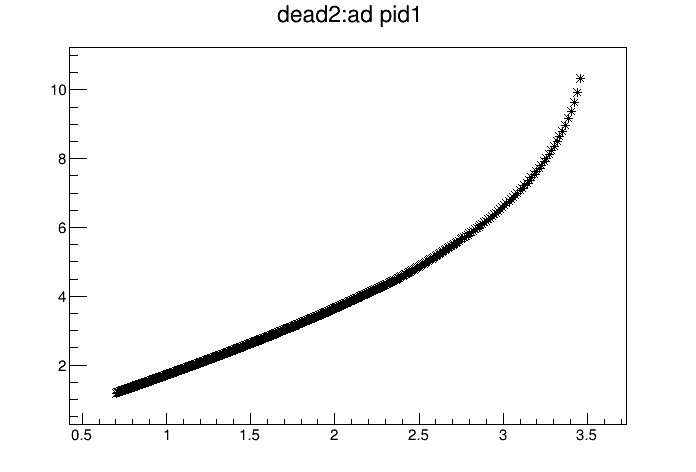

In [5]:
   c1->Clear();
   npid32_2[150]->SetMarkerStyle(3);
   npid32_2[150]->SetNameTitle("dead2:ad pid1","dead2:ad pid1");
   npid32_2[150]->Draw("ap");
   c1->Draw();

In [6]:
TGraph *T1Etheta_old=new TGraph();
TGraph *T1Etheta_new=new TGraph();

TString drawName_new1 = TString::Format("xce[0]:xs[0]:xe2");
TString cutName_new = TString::Format("xce[0]>0.3");

TString graphName_old = TString::Format("taad1_e_theta_old");
TString graphName_new = TString::Format("taad1_e_theta_new");



In [7]:
        Int_t num1=fch->Draw(drawName_new1.Data(),cutName_new.Data());
        if(num1==0) return;
        TGraph2D *e1=new TGraph2D(num1,fch->GetV3(),fch->GetV2(),fch->GetV1());

//利用上一步相同cut中画的事件顺序一致

        Int_t npoints1=e1->GetN();
        if(npoints1==0) return;
        cout<<"npoints1="<<npoints1<<'\n';
/*        TGraph2D *g2D=new TGraph2D(*e1);
        TString tmpgName;
        tmpgName="g2D"+graphName_new;
        g2D->SetNameTitle(tmpgName.Data(), tmpgName.Data());
*/

        Double_t *gd=e1->GetX();
        Double_t *gxs=e1->GetY();
        Double_t *gad=e1->GetZ();


npoints1=3922


In [8]:


TGraph *edelta_E_E=new TGraph();

Int_t count=0,count_E_E=0,count_E35=0,count_pp=0;
Double_t eall,ealltemp,ealltemp_tar,etar=0,Etemp,Etemp0;

//&&fabs(npid32_2[150]->Eval(gad[i])-0.00129902*gd[i]+0.409961)<1
for(Int_t i=0; i<npoints1; i++){
    
   if(gd[i]>1200&&fabs(npid32_2[150]->Eval(gad[i])-0.00146718*gd[i]-0.0494717)<0.5)
       edelta_E_E->SetPoint(count_E_E++,gd[i],npid32_2[150]->Eval(gad[i]));
 }
 cout<<"count="<<count<<'\n';  

count=0


In [9]:
//高能刻度p
Double_t kk,bb;
   TF1 *f12 = new TF1("f12","[0]*x+[1]",1000,4100);
   edelta_E_E->Fit("f12","QR");

   TF1 *fitp2 = edelta_E_E->GetFunction("f12");
   kk = fitp2->GetParameter(0);
   bb = fitp2->GetParameter(1);
   cout<<"k= "<<kk<<'\t'<<"b= "<<bb<<'\n';

k= 0.00139195	b= 0.140018


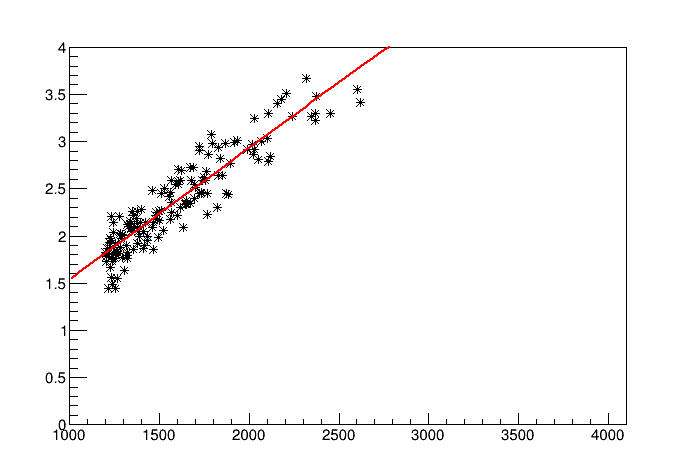

In [10]:
c1->Clear();
edelta_E_E->GetXaxis()->SetLimits(1000, 4100);
edelta_E_E->GetYaxis()->SetRangeUser(0 , 4); 
edelta_E_E->SetMarkerStyle(3);
edelta_E_E->Draw("ap");
c1->SetLogy(0);
c1->Draw();